In [31]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore") 

## Load and process the data

In [32]:
df = pd.read_csv('data/AirPassengers.csv')

In [33]:
df['Month'] = pd.to_datetime(df['Month'])

In [34]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [35]:
y = pd.Series(data=df['#Passengers'].values, index=df['Month'])

In [36]:
y.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
dtype: int64

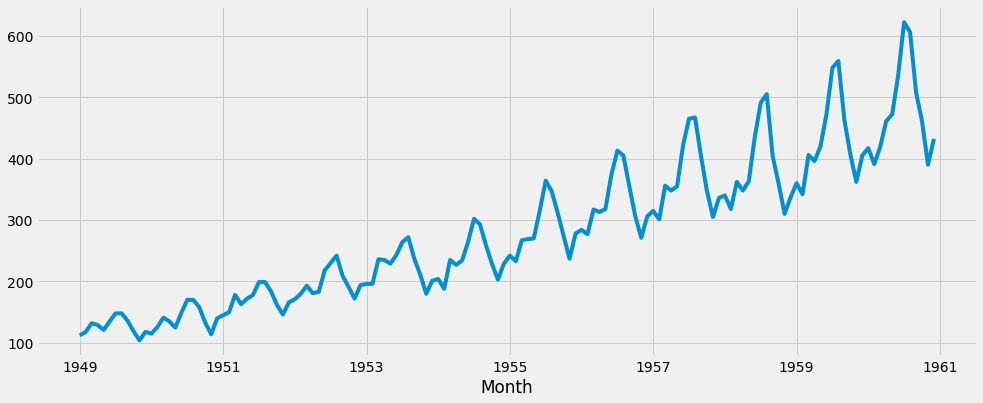

In [37]:
y.plot(figsize=(15, 6))
plt.show()

## Grid search the p, d, q parameters

In [38]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [39]:
best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            
            print('ARIMA{} x {} - AIC: {}'.format(param, param_seasonal, results.aic))

            if results.aic < best_result[2]:
                best_result = [param, param_seasonal, results.aic]
        except:
            continue
            
print('\nBest Result:', best_result)

ARIMA(0, 0, 0) x (0, 0, 0, 12) - AIC: 2044.4329486427587
ARIMA(0, 0, 0) x (0, 0, 1, 12) - AIC: 1887.1433359537339
ARIMA(0, 0, 0) x (0, 0, 2, 12) - AIC: 1498.2861800098556
ARIMA(0, 0, 0) x (0, 1, 0, 12) - AIC: 1315.9211929474204
ARIMA(0, 0, 0) x (0, 1, 1, 12) - AIC: 1156.291490150854
ARIMA(0, 0, 0) x (0, 1, 2, 12) - AIC: 1016.1362797337788
ARIMA(0, 0, 0) x (0, 2, 0, 12) - AIC: 1103.8641596230023
ARIMA(0, 0, 0) x (0, 2, 1, 12) - AIC: 942.1856088448575
ARIMA(0, 0, 0) x (0, 2, 2, 12) - AIC: 834.3017303458392
ARIMA(0, 0, 0) x (1, 0, 0, 12) - AIC: 1118.6259190717344
ARIMA(0, 0, 0) x (1, 0, 1, 12) - AIC: 1107.2562043238856
ARIMA(0, 0, 0) x (1, 0, 2, 12) - AIC: 1014.6452265990938
ARIMA(0, 0, 0) x (1, 1, 0, 12) - AIC: 1109.2437994445115
ARIMA(0, 0, 0) x (1, 1, 1, 12) - AIC: 1033.61721667297
ARIMA(0, 0, 0) x (1, 1, 2, 12) - AIC: 904.4213211128613
ARIMA(0, 0, 0) x (1, 2, 0, 12) - AIC: 974.4396269851046
ARIMA(0, 0, 0) x (1, 2, 1, 12) - AIC: 940.2370895732583
ARIMA(0, 0, 0) x (1, 2, 2, 12) - AIC: 8

ARIMA(0, 1, 2) x (1, 0, 2, 12) - AIC: 900.1407480720688
ARIMA(0, 1, 2) x (1, 1, 0, 12) - AIC: 936.7822150379475
ARIMA(0, 1, 2) x (1, 1, 1, 12) - AIC: 915.1111429658582
ARIMA(0, 1, 2) x (1, 1, 2, 12) - AIC: 820.992177590359
ARIMA(0, 1, 2) x (1, 2, 0, 12) - AIC: 871.3719829150741
ARIMA(0, 1, 2) x (1, 2, 1, 12) - AIC: 824.0789557986476
ARIMA(0, 1, 2) x (1, 2, 2, 12) - AIC: 728.3909654382303
ARIMA(0, 1, 2) x (2, 0, 0, 12) - AIC: 918.4251433141368
ARIMA(0, 1, 2) x (2, 0, 1, 12) - AIC: 920.0741266360974
ARIMA(0, 1, 2) x (2, 0, 2, 12) - AIC: 896.4411961381791
ARIMA(0, 1, 2) x (2, 1, 0, 12) - AIC: 849.1077294091848
ARIMA(0, 1, 2) x (2, 1, 1, 12) - AIC: 850.814323475467
ARIMA(0, 1, 2) x (2, 1, 2, 12) - AIC: 822.9785213359921
ARIMA(0, 1, 2) x (2, 2, 0, 12) - AIC: 770.1665719062037
ARIMA(0, 1, 2) x (2, 2, 1, 12) - AIC: 754.8857807881149
ARIMA(0, 1, 2) x (2, 2, 2, 12) - AIC: 729.0187073246911
ARIMA(0, 2, 0) x (0, 0, 0, 12) - AIC: 1441.350743331749
ARIMA(0, 2, 0) x (0, 0, 1, 12) - AIC: 1243.6526185

ARIMA(1, 0, 1) x (2, 1, 2, 12) - AIC: 839.2558089806088
ARIMA(1, 0, 1) x (2, 2, 0, 12) - AIC: 767.1156376895044
ARIMA(1, 0, 1) x (2, 2, 1, 12) - AIC: 752.2884897807289
ARIMA(1, 0, 1) x (2, 2, 2, 12) - AIC: 746.2099137934235
ARIMA(1, 0, 2) x (0, 0, 0, 12) - AIC: 1381.5217419605033
ARIMA(1, 0, 2) x (0, 0, 1, 12) - AIC: 1282.533198627649
ARIMA(1, 0, 2) x (0, 0, 2, 12) - AIC: 1036.5854047078844
ARIMA(1, 0, 2) x (0, 1, 0, 12) - AIC: 1009.2881584894241
ARIMA(1, 0, 2) x (0, 1, 1, 12) - AIC: 923.3041353900505
ARIMA(1, 0, 2) x (0, 1, 2, 12) - AIC: 836.481152597685
ARIMA(1, 0, 2) x (0, 2, 0, 12) - AIC: 993.8462787290941
ARIMA(1, 0, 2) x (0, 2, 1, 12) - AIC: 832.6688985550007
ARIMA(1, 0, 2) x (0, 2, 2, 12) - AIC: 731.830527149044
ARIMA(1, 0, 2) x (1, 0, 0, 12) - AIC: 1010.7058013458541
ARIMA(1, 0, 2) x (1, 0, 1, 12) - AIC: 984.2779180851637
ARIMA(1, 0, 2) x (1, 0, 2, 12) - AIC: 903.6238571048613
ARIMA(1, 0, 2) x (1, 1, 0, 12) - AIC: 937.6961869306488
ARIMA(1, 0, 2) x (1, 1, 1, 12) - AIC: 929.5691

ARIMA(1, 2, 1) x (0, 2, 2, 12) - AIC: 729.7922161265953
ARIMA(1, 2, 1) x (1, 0, 0, 12) - AIC: 1073.3690518692308
ARIMA(1, 2, 1) x (1, 0, 1, 12) - AIC: 989.1843745202964
ARIMA(1, 2, 1) x (1, 0, 2, 12) - AIC: 907.8028836352062
ARIMA(1, 2, 1) x (1, 1, 0, 12) - AIC: 926.4582272211368
ARIMA(1, 2, 1) x (1, 1, 1, 12) - AIC: 918.4549191268827
ARIMA(1, 2, 1) x (1, 1, 2, 12) - AIC: 831.7807386453508
ARIMA(1, 2, 1) x (1, 2, 0, 12) - AIC: 860.6840937764687
ARIMA(1, 2, 1) x (1, 2, 1, 12) - AIC: 835.2565864866292
ARIMA(1, 2, 1) x (1, 2, 2, 12) - AIC: 731.792217224851
ARIMA(1, 2, 1) x (2, 0, 0, 12) - AIC: 912.2132872813125
ARIMA(1, 2, 1) x (2, 0, 1, 12) - AIC: 914.2073738175075
ARIMA(1, 2, 1) x (2, 0, 2, 12) - AIC: 905.7017500964579
ARIMA(1, 2, 1) x (2, 1, 0, 12) - AIC: 839.1221340834957
ARIMA(1, 2, 1) x (2, 1, 1, 12) - AIC: 839.2664443635715
ARIMA(1, 2, 1) x (2, 1, 2, 12) - AIC: 833.7807298937844
ARIMA(1, 2, 1) x (2, 2, 0, 12) - AIC: 759.6238190450896
ARIMA(1, 2, 1) x (2, 2, 1, 12) - AIC: 749.730077

ARIMA(2, 1, 0) x (2, 0, 2, 12) - AIC: 904.6606815917812
ARIMA(2, 1, 0) x (2, 1, 0, 12) - AIC: 834.1388958374048
ARIMA(2, 1, 0) x (2, 1, 1, 12) - AIC: 836.1266432292769
ARIMA(2, 1, 0) x (2, 1, 2, 12) - AIC: 830.11646019725
ARIMA(2, 1, 0) x (2, 2, 0, 12) - AIC: 753.6967977947572
ARIMA(2, 1, 0) x (2, 2, 1, 12) - AIC: 739.2466160945728
ARIMA(2, 1, 0) x (2, 2, 2, 12) - AIC: 740.0381148245284
ARIMA(2, 1, 1) x (0, 0, 0, 12) - AIC: 1361.38578426425
ARIMA(2, 1, 1) x (0, 0, 1, 12) - AIC: 1168.3690522219388
ARIMA(2, 1, 1) x (0, 0, 2, 12) - AIC: 1027.9355068036648
ARIMA(2, 1, 1) x (0, 1, 0, 12) - AIC: 1010.5527133808541
ARIMA(2, 1, 1) x (0, 1, 1, 12) - AIC: 932.8765080682751
ARIMA(2, 1, 1) x (0, 1, 2, 12) - AIC: 837.8706704918635
ARIMA(2, 1, 1) x (0, 2, 0, 12) - AIC: 998.6256173782757
ARIMA(2, 1, 1) x (0, 2, 1, 12) - AIC: 837.5693419928544
ARIMA(2, 1, 1) x (0, 2, 2, 12) - AIC: 732.9767982153064
ARIMA(2, 1, 1) x (1, 0, 0, 12) - AIC: 998.8582677504924
ARIMA(2, 1, 1) x (1, 0, 1, 12) - AIC: 988.252846

### Plot model diagnostics

In [40]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(best_result[0][0], best_result[0][1], best_result[0][1]),
                                seasonal_order=(best_result[1][0], best_result[1][1], best_result[1][2], best_result[1][3]),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1856      0.195     -6.092      0.000      -1.567      -0.804
ar.L2         -0.4353      0.099     -4.411      0.000      -0.629      -0.242
ma.L1          0.7787      0.204      3.812      0.000       0.378       1.179
ma.S.L12      -1.4145      0.227     -6.239      0.000      -1.859      -0.970
ma.S.L24       0.4839      0.143      3.381      0.001       0.203       0.764
sigma2       118.5130     28.038      4.227      0.000      63.560     173.466


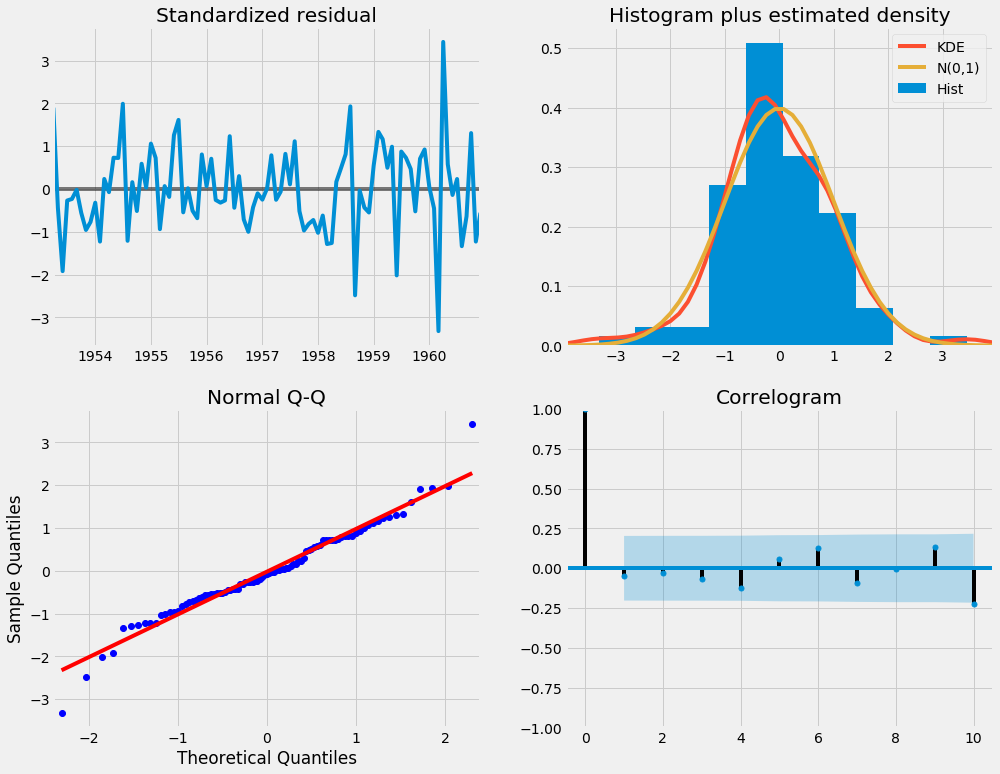

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [42]:
pred = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=False)
pred_ci = pred.conf_int()

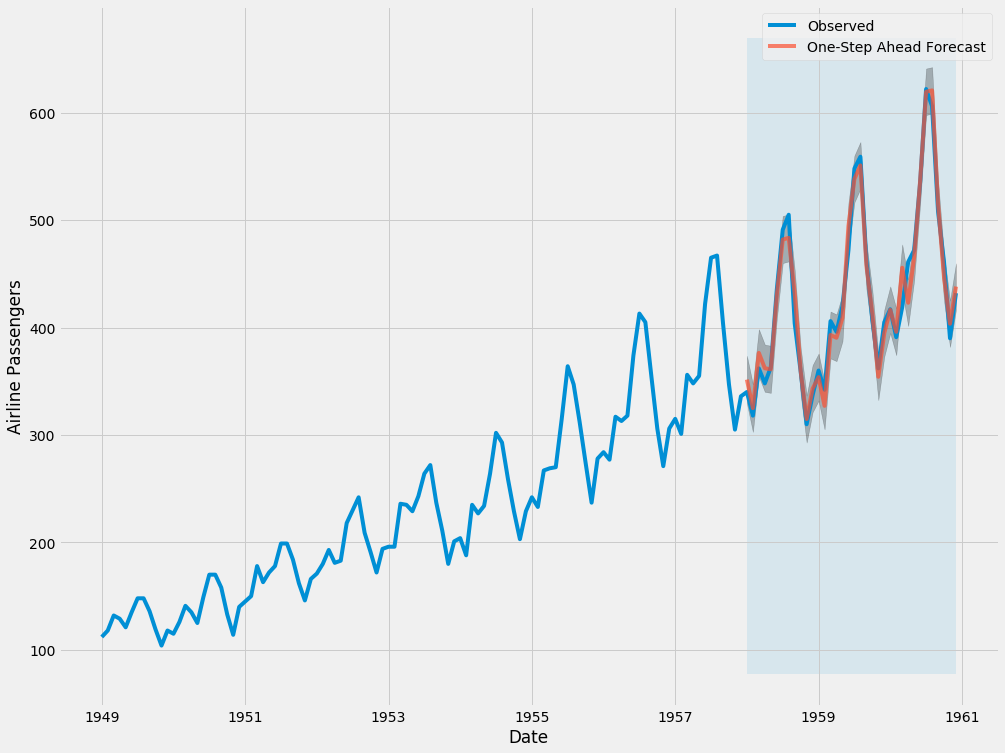

In [43]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred.predicted_mean.plot(ax=ax, label='One-Step Ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')
plt.legend()

plt.show()

In [44]:
# Extract the predicted and true values of our time series
y_forecasted = pred.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 194.81


# Plot dynamic forecast

In [45]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1958-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

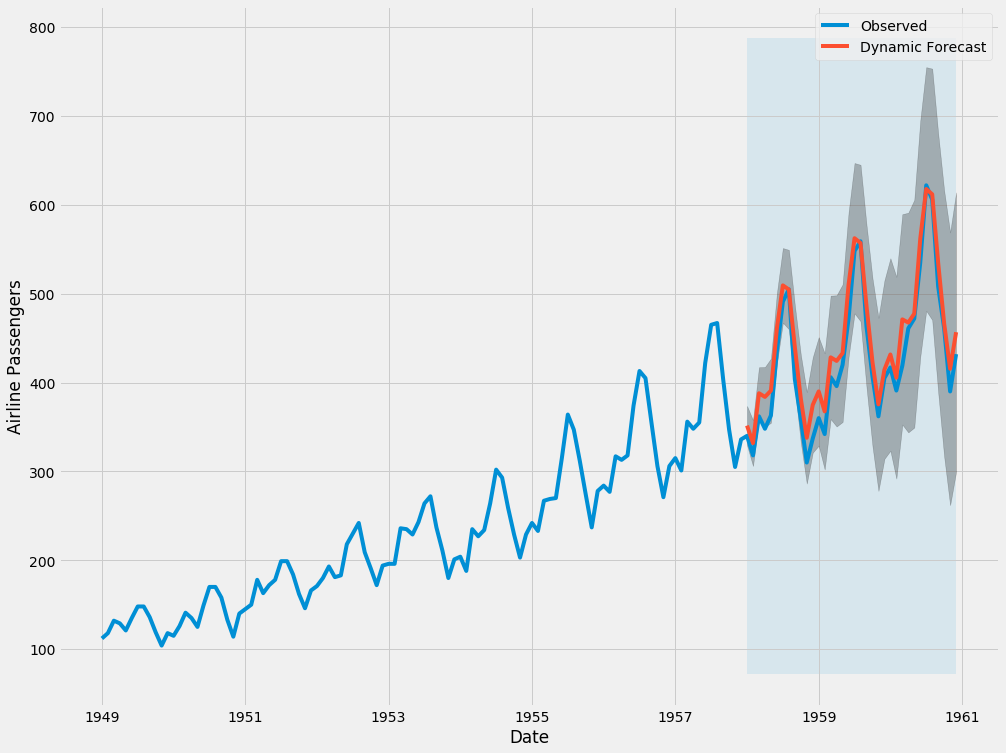

In [46]:
ax = y['1949':].plot(label='Observed', figsize=(15, 12))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1958-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

# Plot one-step ahead forecast

In [47]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1958-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 551.55


# Plot 2-year forecast

In [48]:
# Get forecast 24 steps ahead in future
pred_uc = results.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

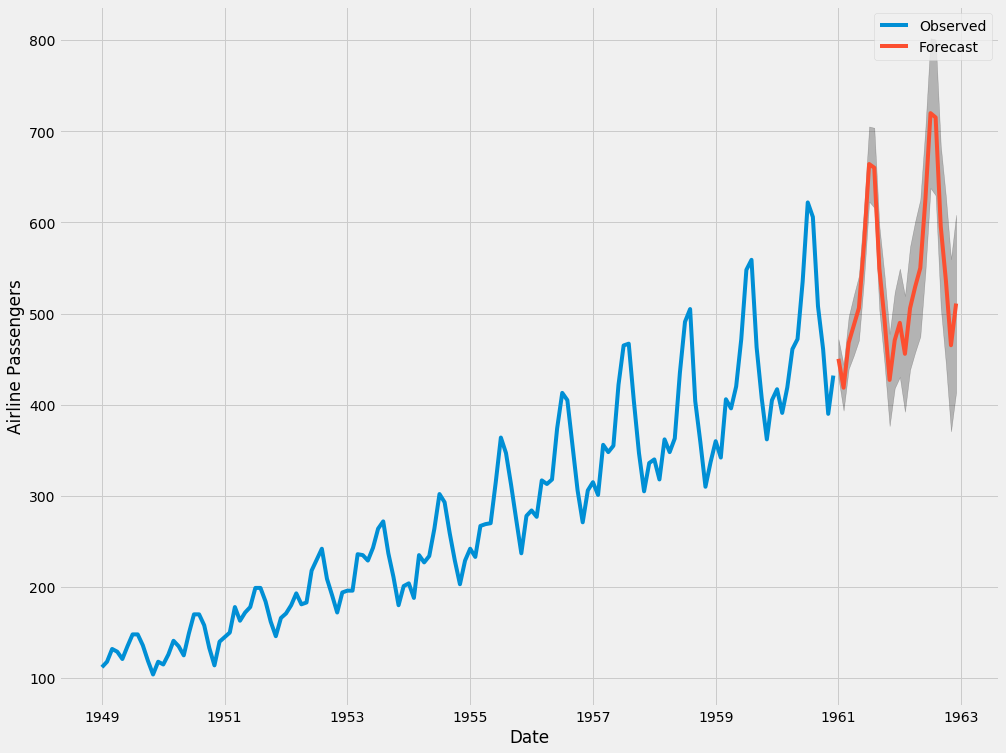

In [49]:
ax = y.plot(label='Observed', figsize=(15, 12))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Airline Passengers')

plt.legend()
plt.show()

In [50]:
pred_uc.predicted_mean

1961-01-01    450.385539
1961-02-01    418.681265
1961-03-01    468.004165
1961-04-01    487.045940
1961-05-01    506.148973
1961-06-01    576.523137
1961-07-01    664.120203
1961-08-01    660.061083
1961-09-01    549.536435
1961-10-01    493.789025
1961-11-01    427.215314
1961-12-01    470.738832
1962-01-01    489.866155
1962-02-01    455.873189
1962-03-01    505.907404
1962-04-01    529.429677
1962-05-01    549.993701
1962-06-01    625.284800
1962-07-01    719.933007
1962-08-01    715.225175
1962-09-01    595.563405
1962-10-01    536.750775
1962-11-01    465.295436
1962-12-01    511.034555
Freq: MS, dtype: float64

In [51]:
pred_ci

,lower y,upper y
1961-01-01,428.792716,471.978362
1961-02-01,393.576977,443.785554
1961-03-01,439.377442,496.630888
1961-04-01,454.074604,520.017277
1961-05-01,470.752917,541.545030
1961-06-01,537.731762,615.314511
1961-07-01,622.934751,705.305655
1961-08-01,616.247008,703.875158
1961-09-01,503.379400,595.693471
1961-10-01,445.394517,542.183533
